<a href="https://colab.research.google.com/github/a-orlova/HomeWork/blob/main/%D0%9B%D0%B0%D0%B1_2_%D0%9E%D1%80%D0%BB%D0%BE%D0%B2%D0%B0_%D0%90%D0%BB%D1%91%D0%BD%D0%B0_%D0%9C%D0%B5%D0%92%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** изучение основных способов визуализации табличных данных с помощью модулей `seaborn`, `plotly`, `altair`, `bokeh`.

**Краткое описание:** в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля `seaborn` (альтернативно можно `matplotlib` со стилями из `seaborn`), второй – с помощью `plotly`, `altair` или `bokeh` на выбор студента. Необязательно каждый раз для второго графика выбирать одну и ту же библиотеку, т.к. не все библиотеки располагают одинаковым набором графиков.

# Данные


По [ссылке](https://drive.google.com/drive/folders/1e0E4vQzaE9LBZgfzz0AzsyAXgtH0eMaP?usp=share_link) расположена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы необходимо выполнять по этим данным. Данные в полном объеме можно найти [по ссылке](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).

##### **Формат данных**

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в финале.

# Практические задания

>По каждому заданию должен быть сделан вывод. Также нужно обязательно добавлять подпись графика и осей.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [ ]:
df = pd.read_csv('song_data.csv')

num_cols = ['BPM', 'energy', 'danceability', 'happiness',
            'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for col in num_cols:
    df[col] = df[col].replace('-', 0).fillna(0).astype(float)

df['loudness'] = df['loudness'].astype(str).str.replace(' dB', '', regex=False)
df['loudness'] = df['loudness'].replace('-', 0).replace('nan', 0).astype(float)

df[num_cols + ['loudness']]


,BPM,energy,danceability,happiness,acousticness,instrumentalness,liveness,speechiness,loudness
0,110.0,36.0,64.0,23.0,58.0,0.0,10.0,3.0,10.0
1,103.0,78.0,70.0,82.0,2.0,0.0,18.0,4.0,6.0
2,103.0,70.0,56.0,11.0,4.0,2.0,32.0,5.0,10.0
3,160.0,55.0,56.0,40.0,5.0,0.0,8.0,7.0,8.0
4,145.0,63.0,66.0,77.0,31.0,0.0,16.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...
560,92.0,58.0,26.0,23.0,55.0,0.0,90.0,8.0,8.0
561,130.0,94.0,64.0,45.0,41.0,0.0,26.0,5.0,4.0
562,136.0,89.0,62.0,56.0,11.0,0.0,20.0,21.0,4.0
563,105.0,31.0,30.0,12.0,1.0,79.0,29.0,3.0,14.0


Результат обработки подтверждает, что преобразования выполнены успешно. Все числовые колонки теперь содержат значения в формате, пригодном для анализа.

## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

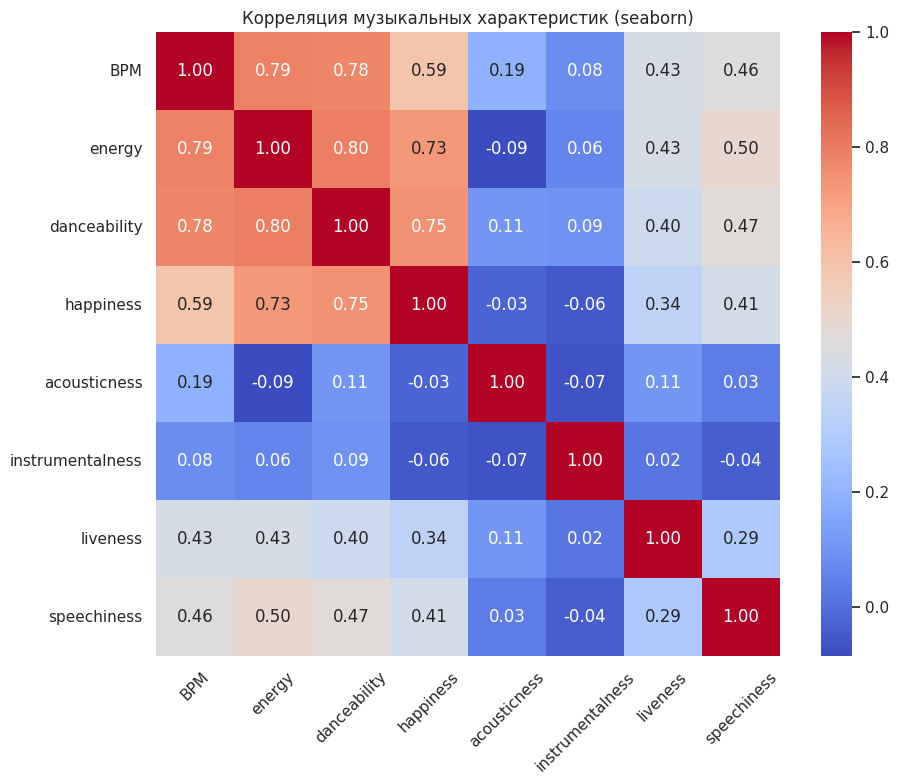

In [ ]:
music_features = ['BPM', 'energy', 'danceability', 'happiness',
                  'acousticness', 'instrumentalness', 'liveness', 'speechiness']

corr_matrix = df[music_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Корреляция музыкальных характеристик (seaborn)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.figure_factory as ff

fig = px.imshow(corr_matrix,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                title='Корреляция музыкальных характеристик (plotly)')
fig.update_layout(width=800, height=700)
fig.show()

Тепловая карта выявила сильные связи между BPM, energy, danceability и happiness, что указывает на взаимозависимость темпа, энергичности, танцевальности и позитива в музыке.

Умеренные корреляции (например, speechiness с энергичностью) показывают роль вокала в динамичных треках.

Acousticness и instrumentalness почти не связаны с другими параметрами, подчеркивая их уникальность.

Видно, что основные характеристики образуют ядро "энергичных" треков, а акустические/инструментальные композиции действуют независимо.

## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



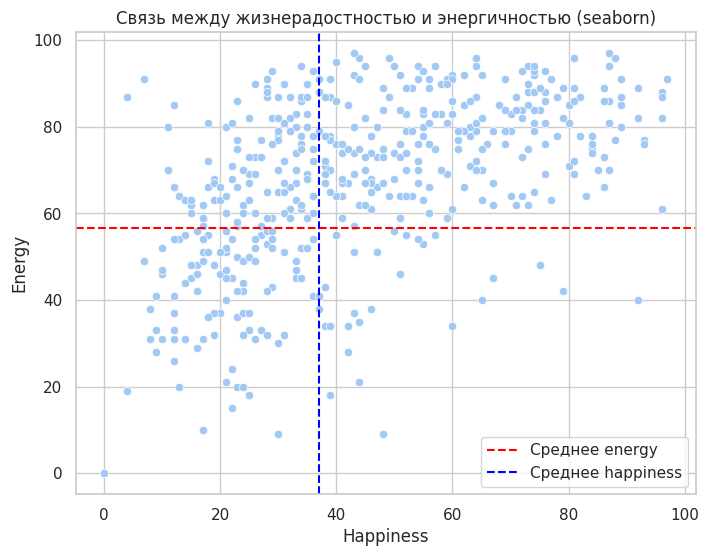

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='happiness', y='energy')

mean_happiness = df['happiness'].mean()
mean_energy = df['energy'].mean()

plt.axhline(mean_energy, color='red', linestyle='--', label='Среднее energy')
plt.axvline(mean_happiness, color='blue', linestyle='--', label='Среднее happiness')


plt.title('Связь между жизнерадостностью и энергичностью (seaborn)')
plt.xlabel('Happiness')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_alt = df.copy()

base = alt.Chart(df_alt).mark_circle(size=60).encode(
    x='happiness',
    y='energy',
    tooltip=['country', 'artist_name', 'song_name', 'happiness', 'energy']
).properties(
    width=600,
    height=400,
    title='Связь между жизнерадостностью и энергичностью (altair)'
)

hline = alt.Chart(pd.DataFrame({'y': [df['energy'].mean()]})).mark_rule(color='red', strokeDash=[5,5]).encode(y='y')
vline = alt.Chart(pd.DataFrame({'x': [df['happiness'].mean()]})).mark_rule(color='blue', strokeDash=[5,5]).encode(x='x')

(base + hline + vline).interactive()



alt.LayerChart(...)

График показывает, что в целом с ростом энергичности увеличивается и уровень жизнерадостности треков. Однако можно заметить немало композиций, которые обладают высокой энергичностью, но при этом низкой жизнерадостностью — это вполне объяснимо, так как, например, агрессивная музыка часто бывает насыщенной по энергии, но не обязательно вызывает позитивные эмоции.

При этом на графике не наблюдается явных выбросов, что свидетельствует о плотной концентрации данных и однородности выборки.

## Задание 4

Покажите на горизонтальной столбчатой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

<ipython-input-72-86e2597487bc>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




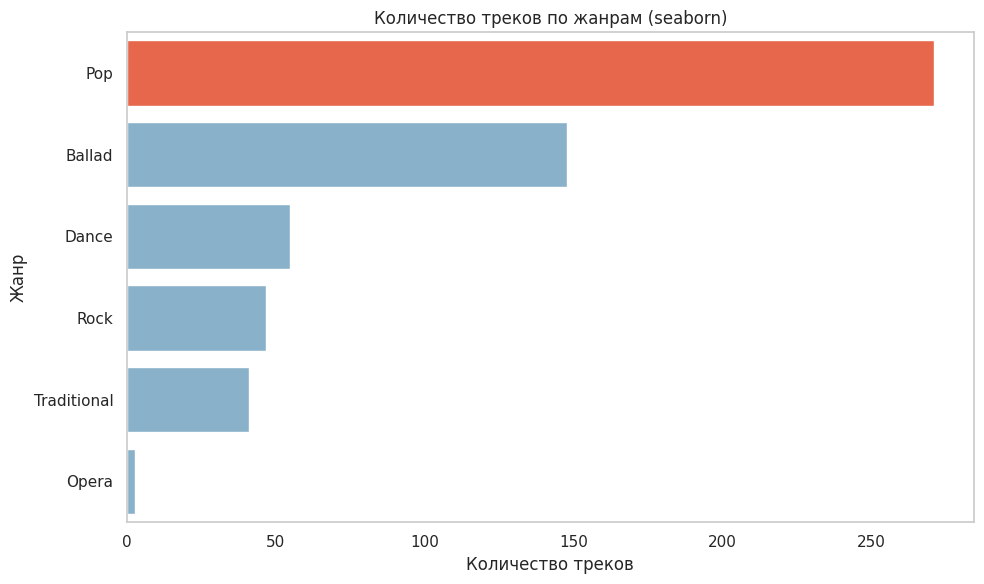

In [ ]:
genre_counts = df['style'].value_counts()

plt.figure(figsize=(10, 6))
palette = ['#FF5733' if genre == genre_counts.idxmax() else '#7FB3D5' for genre in genre_counts.index]

sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=palette)
plt.title('Количество треков по жанрам (seaborn)')
plt.xlabel('Количество треков')
plt.ylabel('Жанр')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



In [ ]:
fig = px.bar(genre_counts.sort_values(ascending=True),
             orientation='h',
             color=genre_counts.index == genre_counts.idxmax(),
             color_discrete_map={True: '#FF5733', False: '#7FB3D5'},
             title='Количество треков по жанрам (plotly)')

fig.update_layout(
    xaxis_title='Количество треков',
    yaxis_title='Жанр',
    showlegend=False,
    height=500
)

fig.show()


Доминирование жанра Рор подтверждает его популярность в датасете.

Жанры Dance и Rock занимают второе и третье места, что типично для современных музыкальных предпочтений.

Opera и Traditional представлены минимально, что может отражать нишевый характер этих жанров.

## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

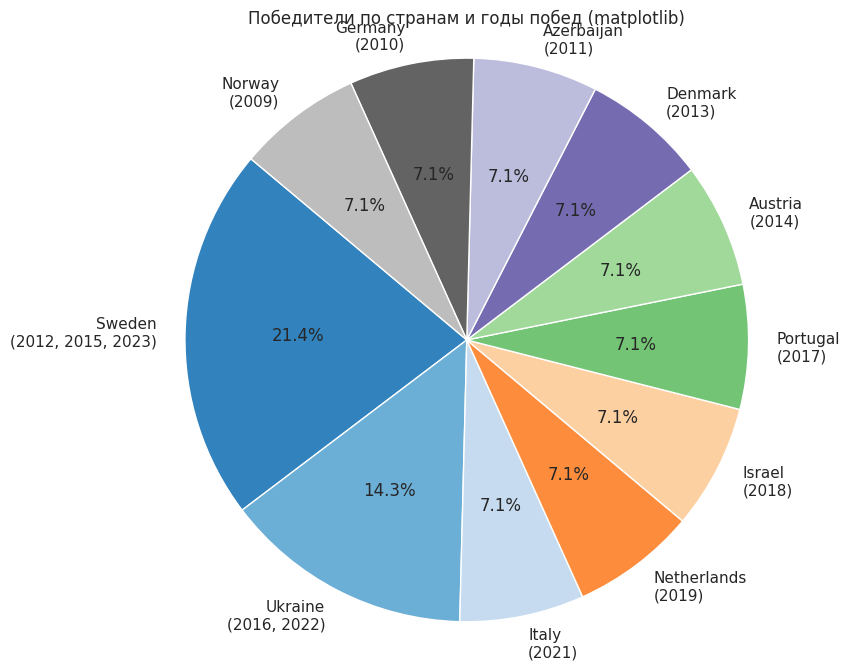

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

winners = df[df['final_place'] == 1]

win_counts = winners['country'].value_counts()
win_years = winners.groupby('country')['year'].apply(lambda years: ', '.join(map(str, sorted(years))))

labels = [f"{country}\n({win_years[country]})" for country in win_counts.index]

num_colors = len(win_counts)
cmap = colormaps.get_cmap('tab20c')
colors = [cmap(i / num_colors) for i in range(num_colors)]

plt.figure(figsize=(8, 8))
plt.pie(win_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Победители по странам и годы побед (matplotlib)')
plt.axis('equal')
plt.show()


In [ ]:
winners_summary = winners.groupby('country').agg(
    wins=('year', 'count'),
    years=('year', lambda x: ', '.join(map(str, sorted(x))))
).reset_index()

fig = px.pie(winners_summary,
             names='country',
             values='wins',
             title='Победители по странам и годы побед (plotly)',
             hover_data=['years'],
             labels={'years': 'Годы побед'})

fig.update_traces(textinfo='percent+label', hovertemplate='<b>%{label}</b><br>Побед: %{value}<br>Годы: %{customdata[0]}')
fig.show()


Швеция доминирует в списке победителей, это указывает на её стабильно высокие результаты. Украина занимает второе место с двумя победами.

Большинство стран (9 из 11) побеждали только один раз, что подчеркивает разнообразие победителей.

## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

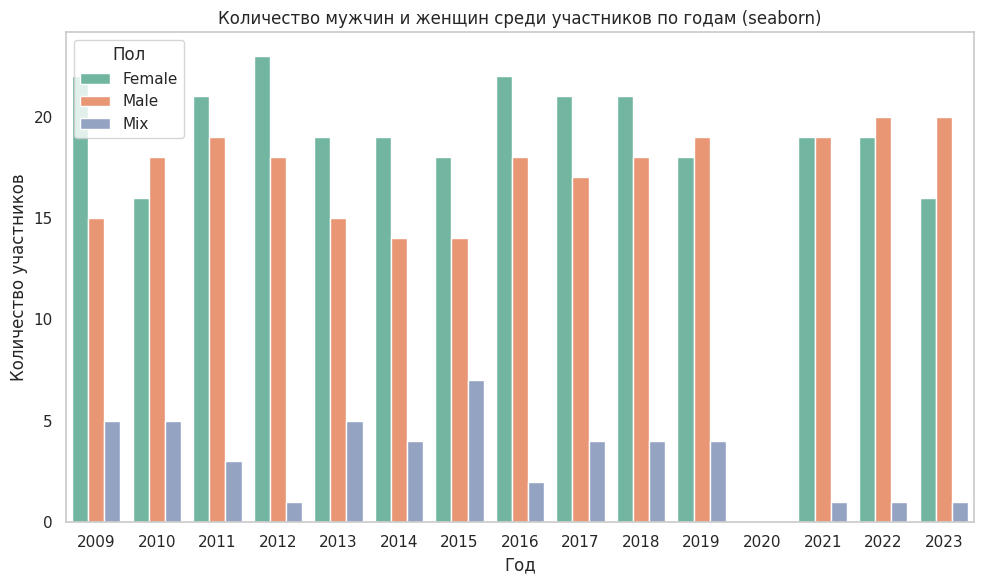

In [ ]:
gender_year = df.groupby(['year', 'gender']).size().reset_index(name='count')

all_years = sorted(set(df['year'].unique()) | {2020})
all_genders = df['gender'].dropna().unique()

all_combinations = pd.MultiIndex.from_product([all_years, all_genders], names=['year', 'gender'])
gender_year = gender_year.set_index(['year', 'gender']).reindex(all_combinations, fill_value=0).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_year, x='year', y='count', hue='gender', palette='Set2')
plt.title('Количество мужчин и женщин среди участников по годам (seaborn)')
plt.xlabel('Год')
plt.ylabel('Количество участников')
plt.legend(title='Пол')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
gender_year = df.groupby(['year', 'gender']).size().reset_index(name='count')

all_years = sorted(set(df['year'].unique()) | {2020})
all_genders = df['gender'].dropna().unique()

all_combinations = pd.MultiIndex.from_product([all_years, all_genders], names=['year', 'gender'])
gender_year = gender_year.set_index(['year', 'gender']).reindex(all_combinations, fill_value=0).reset_index()

gender_year['year'] = gender_year['year'].astype(int)

fig = px.bar(gender_year,
             x='year',
             y='count',
             color='gender',
             barmode='group',
             title='Количество мужчин и женщин среди участников по годам (plotly)',
             labels={'year': 'Год', 'count': 'Количество участников', 'gender': 'Пол'},
             color_discrete_map={'Male': '#636EFA', 'Female': '#EF553B'})

fig.update_layout(
    width=800,
    height=500,
    legend_title_text='Пол',
    xaxis={
        'type': 'category',
        'categoryorder': 'array',
        'categoryarray': sorted(all_years)
    },
    hovermode='x unified'
)

fig.show()


По графикам видно, что за весь период с 2009 по 2023 год, в большинстве случаев свои страны предаставляли певцы-мужчины, однако с 2019 года начался заметный прирост артистов-женщин. Количество смешанных выступлений всегда минимально, это говорит о том, что отдельных странах или культурах традиционно доминируют сольные артисты.

## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

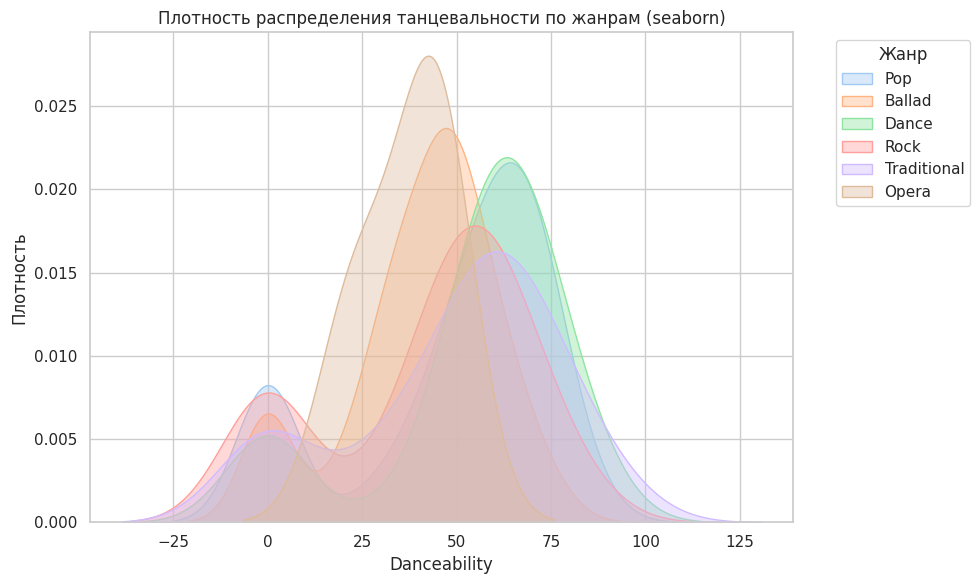

In [ ]:
plt.figure(figsize=(10, 6))

for style in top_styles:
    sns.kdeplot(
        data=df_filtered[df_filtered['style'] == style],
        x='danceability',
        fill=True,
        common_norm=False,
        alpha=0.4,
        label=style
    )

plt.title('Плотность распределения танцевальности по жанрам (seaborn)')
plt.xlabel('Danceability')
plt.ylabel('Плотность')
plt.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df_density = df.dropna(subset=['style'])

density_plot = alt.Chart(df_density).transform_density(
    'danceability',
    as_=['danceability', 'density'],
    groupby=['style']
).mark_area(opacity=0.4).encode(
    x='danceability:Q',
    y='density:Q',
    color='style:N'
).properties(
    title='Плотность распределения танцевальности по жанрам (altair)',
    width=700,
    height=400
)

density_plot


alt.Chart(...)

Согласно графику, самыми танцевальными жанрами оказались Ballad, Dance и, неожиданно, Opera.

В то же время жанр Pop, который, казалось бы, должен быть в лидерах по танцевальности, показал одни из самых низких значений.  

Жанры Rock и Traditional, напротив, предсказуемо показали низкий уровень танцевальности.

## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

<ipython-input-87-f0117095a40a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




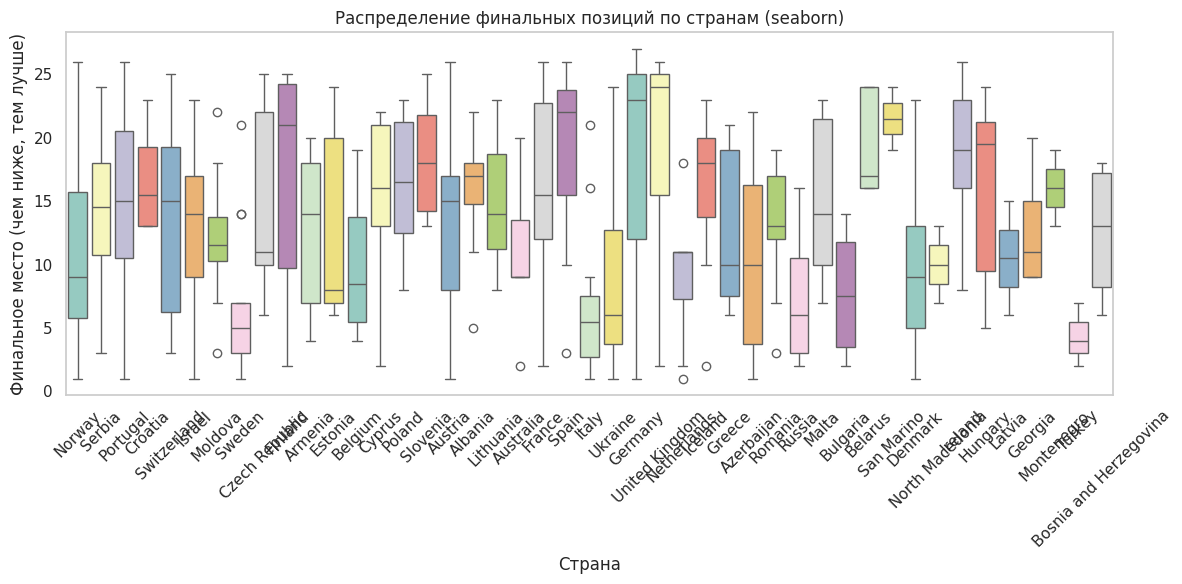

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df.dropna(subset=['final_place']),
            x='country', y='final_place', palette='Set3')

plt.title('Распределение финальных позиций по странам (seaborn)')
plt.xlabel('Страна')
plt.ylabel('Финальное место (чем ниже, тем лучше)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
fig = px.box(df.dropna(subset=['final_place']),
             x='country',
             y='final_place',
             color='country',
             title='Распределение финальных позиций по странам (plotly)',
             labels={'final_place': 'Финальное место', 'country': 'Страна'})

fig.update_layout(xaxis_title='Страна',
                  yaxis_title='Финальное место (чем ниже, тем лучше)',
                  xaxis_tickangle=-45,
                  showlegend=False)

fig.show()


Лидеры с стабильно высокими позициями (медиана примерно 3-5 место): Турция, Швеция, Италия, Россия, Украина

Страны со средне-высокими результатами (медиана около 5-10 места): Болгария, Эстония, Бельгия, Дания, Австрия, Норвегия, Азербайджан, Греция

Страны со средними результатами (медиана около 10-15 места): Северная Македония, Латвия, Нидерланды, Чехия, Молдова, Румыния, Израиль, Мальта

Страны с преимущественно низкими результатами (медиана 15-20 места): Литва, Армения, Сербия, Португалия, Швейцария, Австрия, Франция, Хорватия

Страны-аутсайдеры (медиана ниже 20 места): Германия, Великобритания, Словакия, Испания, Сан-Марино

## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

In [ ]:
finals_by_country = df[df['final_place'].notna()].groupby('country').size().reset_index(name='final_count')


In [ ]:
fig = px.choropleth(finals_by_country,
                    locations='country',
                    locationmode='country names',
                    color='final_count',
                    color_continuous_scale='Blues',
                    title='Количество выходов в финал по странам',
                    labels={'final_count': 'Выходов в финал'})

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


<ipython-input-91-dc9afc944f21>:15: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



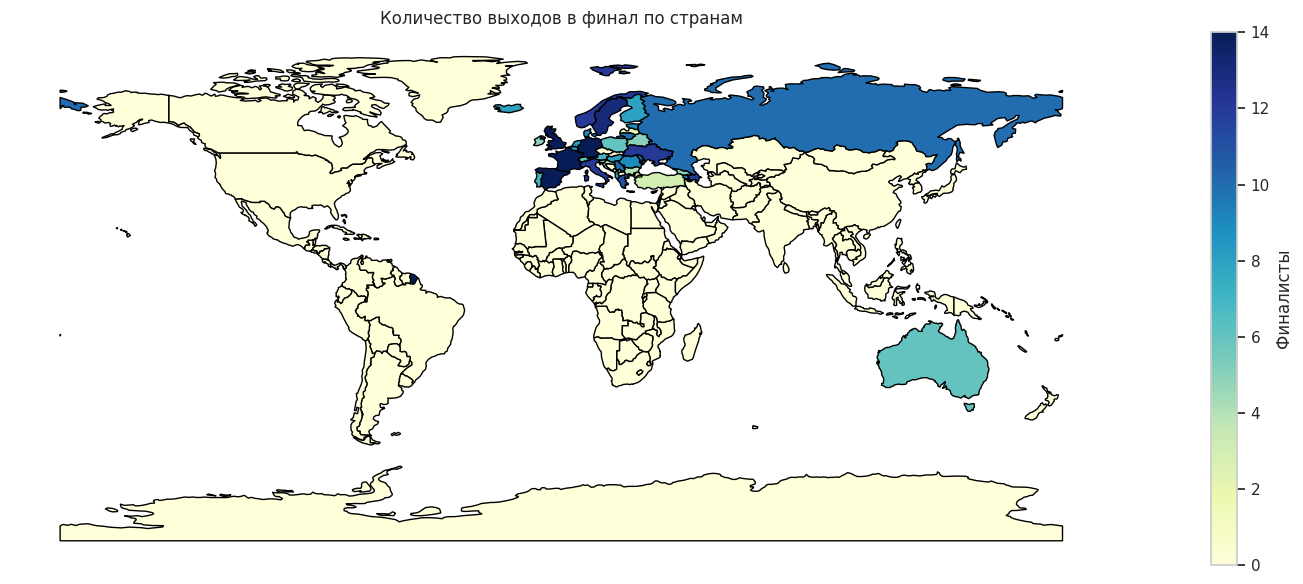

In [ ]:
import geopandas as gpd

finalists_per_country = df[df['final_place'].notna()] \
    .groupby('country')['final_place'] \
    .count() \
    .reset_index() \
    .rename(columns={'final_place': 'final_count'})

sns.set(style="whitegrid", palette="pastel")

countries = gpd.read_file("https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson")
merged = countries.merge(finalists_per_country, left_on='name', right_on='country', how='left').fillna(0)

fig, ax = plt.subplots(figsize=(20, 6))

merged.plot(column='final_count',
            cmap='YlGnBu',
            edgecolor='black',
            legend=True,
            legend_kwds={'label': "Финалисты"},
            ax=ax)

plt.title('Количество выходов в финал по странам')
ax.set_axis_off()
plt.tight_layout()
plt.show()


Можно увидеть, что в основном в финал попадают страны из северной и западной части Европы, исключениями являются Россия и Украина. Центральная часть Европы в среднем реже попадает в финал

## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

In [ ]:
import plotly.express as px

top_3 = df[df['final_place'].isin([1, 2, 3])]

top_3_count = top_3.groupby('country').size().reset_index(name='top_3_count')

fig = px.treemap(top_3_count,
                 path=['country'],
                 values='top_3_count',
                 title='Количество попаданий в топ-3 победителей по странам (plotly)',
                 color='top_3_count',
                 color_continuous_scale='Blues')

fig.show()


Россия, Украина, Италия и Азербайджан имеют наибольшее количество попаданий, но лидером все также остается Швеция.

Австрия, Нидерланды, Израиль попадали в топ по 2 раза, остальные страны всего по одному, это говорит о равномерном распределении победителей.

# Дополнительное задание
Постройте график плотности распределения energy для песен, занявших топ-10 мест, и для тех, что оказались в нижней десятке. Выполните с помощью seaborn на одном графике.

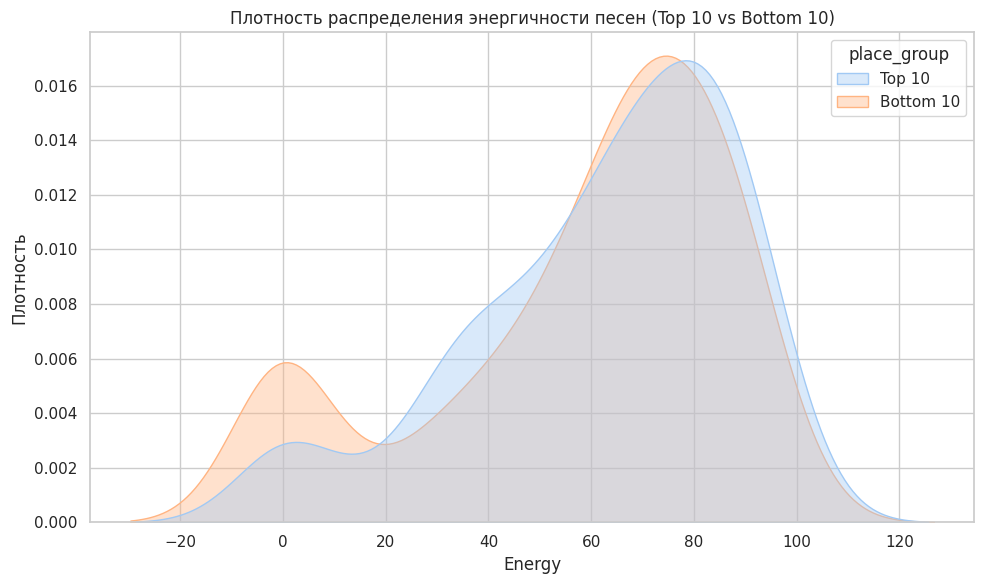

In [ ]:
df_plot = df[df['final_place'].notna()].copy()
df_plot['place_group'] = pd.cut(
    df_plot['final_place'],
    bins=[0, 10, df_plot['final_place'].max()],
    labels=['Top 10', 'Bottom 10']
)

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_plot,
    x='energy',
    hue='place_group',
    fill=True,
    common_norm=False,
    alpha=0.4
)

plt.title('Плотность распределения энергичности песен (Top 10 vs Bottom 10)')
plt.xlabel('Energy')
plt.ylabel('Плотность')

handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles=handles, title='Группа', loc='upper right')

plt.tight_layout()
plt.show()



Пик плотности обеих групп находится примерно в одном диапазоне — это значит, что большинство песен, как в топе, так и внизу, имеют высокую энергичность

Bottom 10 показывает второй пик в районе 0–10 energy — это говорит о том, что среди проигравших есть заметное количество малоэнергичных треков

Top 10 более равномерно сосредоточены в среднем и высоком диапазоне energy — они почти не представлены в области низкой энергичности

В итоге:

Песни с низкой энергичностью чаще оказываются в нижней части рейтинга, в то время как песни со средней и высокой энергичностью чаще попадают в топ.

Хотя высокая энергичность не гарантирует успех, недостаток её явно может повлиять на результат негативно.

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 10 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой построение визуализации по данным из лабораторной работы, по сложности аналогичной тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Покажите на ящиковой диаграмме распределение танцевальности для каждого жанра. Выполните с помощью `seaborn`.
2. На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью `plotly`.
3. Покажите на диаграмме вида `treemap`, сколько раз каждая страна проходила в финал. Выполните с помощью `plotly`.

# Дополнительные материалы

1. seaborn: statistical data visualization [Электронный ресурс]. URL: https://seaborn.pydata.org/ (дата обращения: 01.04.2024).
2. Plotly Open Source Graphing Libraries [Электронный ресурс]. URL: https://plotly.com/graphing-libraries/ (дата обращения: 01.04.2024).
3. Vega-Altair: Declarative Visualization in Python [Электронный ресурс]. URL: https://altair-viz.github.io/index.html (дата обращения: 01.04.2024).